<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Pratham_202101102_Energy_Efficiency_removing_Null_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation Details: -**

**Problem Statement: - Predicting "Energy Efficiency" using regression on EV Charging dataset**

Whole implementation is devided into 3 Major components: -
<br>**1) Data Visualisation**
<br>**2) Data Preprocessing**
<br>**3) Regression analysis**

**1) Data Visualisation**: - Several techniques, including box plots, scatter plots, and heat maps, are used at this phase of implementation to see how the data is distributed.

<br>**2) Data Preprocessing**: - In this part several problems are solved using different inbuilt pandas methods.
<br> **Problems faced & appropriate solution: -** : - 1) Having too much Null values in the dataset(nearly: - 1,00,000)
<br>**sol**: - Removed all Null values from the dataset.
<br>2) Features having format HH:MM:SS, Date.
<br>**sol**: - Changed the values to numeric for data format using custom function, and converted HH:MM:SS to hours.(Note: - Date is having time zone that's why used a custom function to deal with both date + time zone)
<br>3) Reducing Dimentionality: -
<br>**sol**: - Removed several features based on Domain knowledge which contributes very less while predicting target feature.
<br>4) Categorical features.
<br>**sol**: - Used Label encoding to convert categorical data into numeric format.

<br>**3) Regression analysis**: - In this section dataset is devided into training and testing. 5 Models have been selected for regression analysis.
A. Linear Regression, B. SGD Regression, C. Polynomial Regression, D. Random Forest Regeression, E. Gradient Boosting regression.
<br> **Results obtain**: -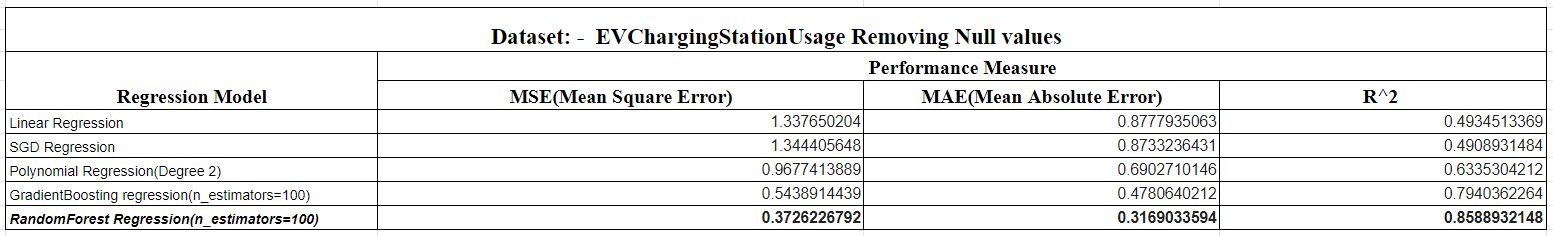
**Observations**: - As shown in above table **Random forest regression outperforms** all other regression models in terms of all performance measures.
<br>- Linear regression, SGD regression,polynomial regression is having very high MSE, MAE error, this is happenning because these models are not complex enough to capture the relation between target variable and dependent variable, also this is the main reason why random forest regression outperforms each model because it is good at capturing complex relations between dependent(energy efficiency) and independent variables.

# **Imports**

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# **Mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [ ]:
df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")

<ipython-input-47-041004de04d7>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv("/content/drive/MyDrive/Data_Mining/EVChargingStationUsage.csv")


# **Data Visualisation**

## **Box Plot**

In [ ]:
df_box = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_efficiency.csv')

In [ ]:
df_box.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Charging_time_hours', 'Charging Efficiency'],
      dtype='object')

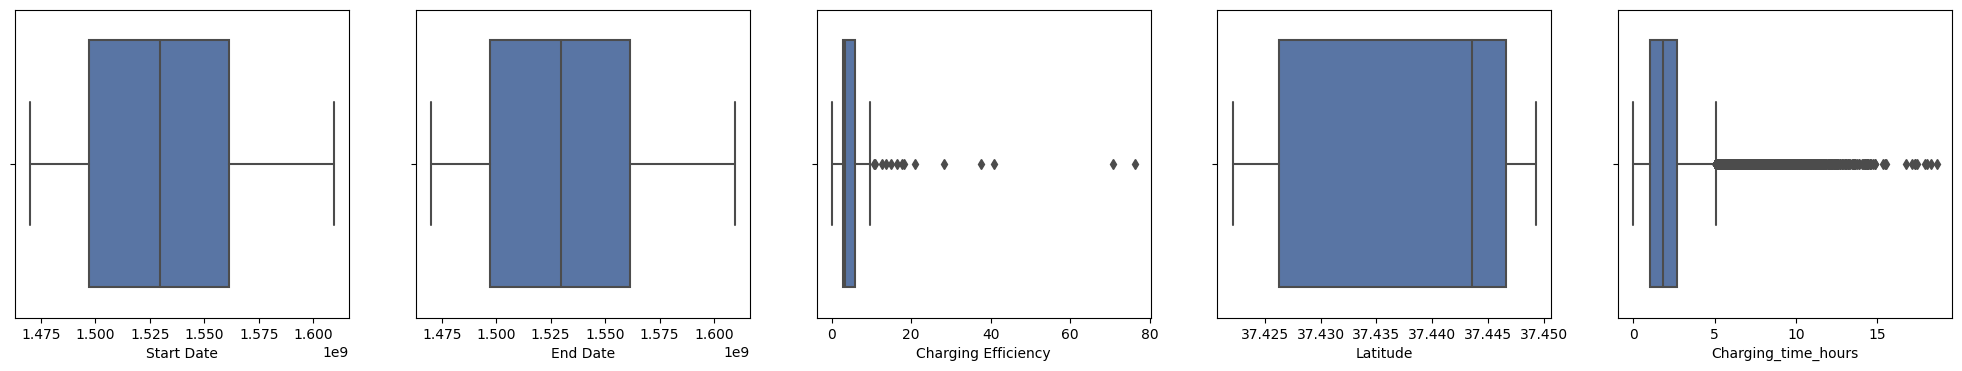

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25,4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Start Date', 'End Date','Charging Efficiency',
       'Latitude', 'Charging_time_hours' ]):
    sns.boxplot(x=df_box[col], ax=ax[axid])

## **Scatter Plot**

<Axes: xlabel='Charging_time_hours', ylabel='Charging Efficiency'>

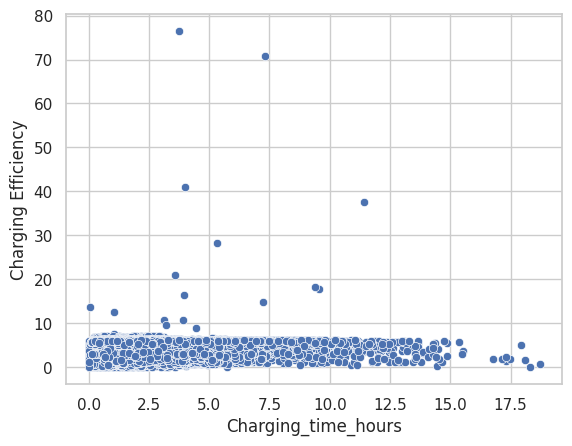

In [ ]:
sns.scatterplot(x = df_box['Charging_time_hours'], y = df_box['Charging Efficiency'])

<Axes: xlabel='Driver Postal Code', ylabel='Charging Efficiency'>

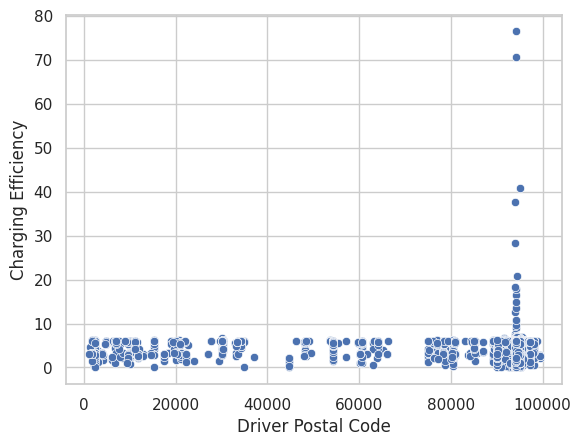

In [ ]:
sns.scatterplot(x = df_box['Driver Postal Code'], y = df_box['Charging Efficiency'])

## **Heatmap**

<Axes: >

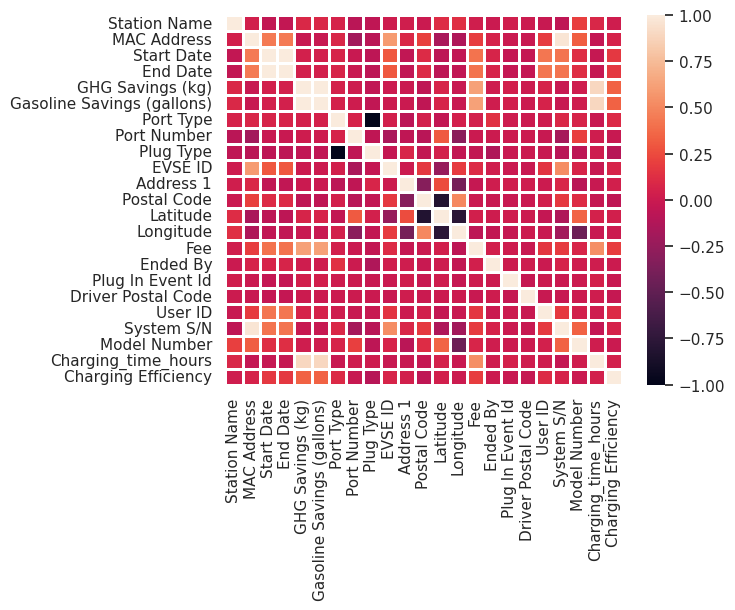

In [ ]:
sns.heatmap(data=df_box.corr(), lw = 1)

## **Removing Redundant Features**

In [ ]:
columns_to_drop=['Currency','County','Org Name']
df_main.drop(columns=columns_to_drop, inplace=True)

# **Data Preprocessing**

## **Remove Entries having Nan value**

In [ ]:
data_cleaned = df_main.dropna()

In [ ]:
data_cleaned.isnull().sum()

Station Name                       0
MAC Address                        0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Fee                                0
Ended By                           0
Plug In Event Id                   0
Driver Postal Code                 0
U

In [ ]:
data_cleaned.shape

(169446, 25)

## **Converting *Start date, Start time Zone,End date,End time Zone* to numeric**

In [ ]:
selected_columns = ["Start Date", "Start Time Zone"]

# Create a new DataFrame with the selected columns
dfa = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)

data_cleaned["Start Date"] = dfa["NumericValue"]

              Start Date Start Time Zone          ConvertedDateTime  \
78948      8/1/2016 5:21             PDT        2016-08-01 05:21:00   
78949      8/1/2016 6:01             PDT        2016-08-01 06:01:00   
78950      8/1/2016 6:03             PDT        2016-08-01 06:03:00   
78951      8/1/2016 6:10             PDT        2016-08-01 06:10:00   
78952      8/1/2016 6:13             PDT        2016-08-01 06:13:00   
...                  ...             ...                        ...   
259410  12/31/2020 16:39             PST  2020-12-31 16:39:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
78948   1.470029e+09  
78949   1.470031e+09  
78950   1.470031e+09  
78951   1.470032e+09  
78952   1.470032e+09  
...      

<ipython-input-52-5fe1e3c85d9c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-52-5fe1e3c85d9c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values
<ipython-input-52-5fe1e3c85d9c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
print("Original dataset:")
print(data_cleaned)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

# Filter out rows with invalid date and time values
data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]

# Print the dataset after dropping invalid rows
# print("\nDataset after dropping invalid rows:")
# print(df_main)

Original dataset:
                          Station Name          MAC Address    Start Date  \
78948      PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  1.470029e+09   
78949      PALO ALTO CA / CAMBRIDGE #2  0024:B100:0002:13B7  1.470031e+09   
78950      PALO ALTO CA / CAMBRIDGE #1  0024:B100:0002:1329  1.470031e+09   
78951       PALO ALTO CA / HAMILTON #2  0024:B100:0002:1331  1.470032e+09   
78952           PALO ALTO CA / HIGH #1  0024:B100:0002:10FE  1.470032e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \

<ipython-input-53-80ddd35c4a75>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]


In [ ]:
selected_columns = ['End Date', 'End Time Zone']

# Create a new DataFrame with the selected columns
dfb = data_cleaned[selected_columns]

In [ ]:
import pandas as pd
import pytz
from datetime import datetime

# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

# Function to convert date and time to numeric value
def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

# Convert PST to PDT and apply numeric conversion
converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)

data_cleaned["End Date"] = dfa["NumericValue"]

                End Date End Time Zone          ConvertedDateTime  \
78948      8/1/2016 6:49           PDT        2016-08-01 06:49:00   
78949     8/1/2016 10:58           PDT        2016-08-01 10:58:00   
78950      8/1/2016 9:15           PDT        2016-08-01 09:15:00   
78951      8/1/2016 8:54           PDT        2016-08-01 08:54:00   
78952      8/1/2016 9:33           PDT        2016-08-01 09:33:00   
...                  ...           ...                        ...   
259410  12/31/2020 17:14           PST  2020-12-31 17:14:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
78948   1.470034e+09  
78949   1.470049e+09  
78950   1.470043e+09  
78951   1.470042e+09  
78952   1.470044e+09  
...              ...  
259410  1.

<ipython-input-55-89e9d7c67890>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-55-89e9d7c67890>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values


In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Latitude',
       'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'User ID', 'County', 'System S/N',
       'Model Number'],
      dtype='object')

## **Dropping Transacting date**

**Reason**: - Transaction Date and End date are having same values mostly so it doesn't provide additional information, therefore dropping it for reducting computational complexity

In [ ]:
columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

## **Converting *Total time, charging time*(having format HH:MM:SS) to hours**

In [ ]:
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

In [ ]:
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

# **Visualising Data after Data preprocessing**

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,City,State/Province,Postal Code,...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
78948,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,1.470029e+09,1.470029e+09,4.464626,109701.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1665,94587.0,523487,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.466111,1.423889
78949,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,1.470031e+09,1.470031e+09,7.501231,107427.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1771,95030.0,141845,Santa Clara County,1.428410e+11,CT4020-HD-GW,4.940833,2.517778
78950,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,1.470031e+09,1.470031e+09,10.891753,109701.0,400 Cambridge Ave,Palo Alto,California,94306,...,0.0,Plug Out at Vehicle,1666,80525.0,203603,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.204722,3.188333
78951,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,1.470032e+09,1.470032e+09,6.968250,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,0.0,Plug Out at Vehicle,2093,94539.0,126575,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.740278,2.430278
78952,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,1.470032e+09,1.470032e+09,17.938757,104339.0,528 High St,Palo Alto,California,94301,...,0.0,Plug Out at Vehicle,3112,94024.0,191743,Santa Clara County,1.422410e+11,CT4020-HD-GW,3.323333,3.320833


## **Handling Categorical features**

### **Label Encode ------> Categorical Features**
**Categorical Features = ['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province', 'Ended By', 'County', 'Model Number']**

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Station Name', 'MAC Address', 'Port Type', 'Plug Type', 'Address 1',
       'City', 'State/Province', 'Country', 'Ended By', 'User ID',
       'Model Number'],
      dtype='object')


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'User ID']

In [ ]:
print(categorical_columns)

['Station Name', 'MAC Address', 'Port Type', 'Plug Type', 'Address 1', 'City', 'State/Province', 'Country', 'Ended By', 'Model Number']


In [ ]:
categorical_columns_1  = ['County', 'Model Number']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
  le = LabelEncoder()
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
  label_encoders[column] = le

print(data_cleaned)

        Station Name  MAC Address    Start Date      End Date  Energy (kWh)  \
78948              7           22  1.470029e+09  1.470029e+09      4.464626   
78949              8           24  1.470031e+09  1.470031e+09      7.501231   
78950              7           22  1.470031e+09  1.470031e+09     10.891753   
78951             13           23  1.470032e+09  1.470032e+09      6.968250   
78952             14           17  1.470032e+09  1.470032e+09     17.938757   
...              ...          ...           ...           ...           ...   
259410            42           41  1.609433e+09  1.609433e+09      1.841000   
259411            44           27  1.609433e+09  1.609433e+09     12.744000   
259412            21           61  1.609436e+09  1.609436e+09     29.665000   
259413            44           27  1.609437e+09  1.609437e+09     11.976000   
259414            10           44  1.609439e+09  1.609439e+09      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons

# **Dropping *City, State/Province***

**Reason**: - Feature has single value

In [ ]:
data_cleaned.drop(['City'],axis=1,inplace = True)
data_cleaned.drop(['State/Province'],axis=1,inplace=True)

# **Visualising data after *Label encoding***

In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,System S/N,Model Number,Total_time_hours,Charging_time_hours
78948,7,22,1.470029e+09,1.470029e+09,4.464626,1.875,0.560,1,1,0,...,-122.146065,0.0,8,1665,94587.0,523487,1.427410e+11,6,1.466111,1.423889
78949,8,24,1.470031e+09,1.470031e+09,7.501231,3.151,0.941,1,1,0,...,-122.146065,0.0,8,1771,95030.0,141845,1.428410e+11,6,4.940833,2.517778
78950,7,22,1.470031e+09,1.470031e+09,10.891753,4.575,1.367,1,2,0,...,-122.146065,0.0,8,1666,80525.0,203603,1.427410e+11,6,3.204722,3.188333
78951,13,23,1.470032e+09,1.470032e+09,6.968250,2.927,0.875,1,1,0,...,-122.159904,0.0,8,2093,94539.0,126575,1.427410e+11,6,2.740278,2.430278
78952,14,17,1.470032e+09,1.470032e+09,17.938757,7.534,2.251,1,1,0,...,-122.162849,0.0,8,3112,94024.0,191743,1.422410e+11,6,3.323333,3.320833


# **Saving Processed dataframe to google drive in csv format**

**Reason**: - Preprocessing data is a time consuming process, therefore it is better to save the processed file for later use which saves lots of computation power and also preprocessing time

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_included.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'System S/N',
       'Model Number', 'Total_time_hours', 'Charging_time_hours'],
      dtype='object')

# **Creating target variable Energy efficiency by deviding energy and total time**

In [ ]:
data_cleaned['Energy Efficiency'] = data_cleaned['Energy (kWh)'] / data_cleaned['Total_time_hours']

In [ ]:
data_cleaned.drop(['Energy (kWh)', 'Total_time_hours'],axis=1,inplace=True)

In [ ]:
path = '/content/drive/MyDrive/Data_Mining/data_cleaned_energy_efficiency.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned.csv')

# **Regression Analysis On EV Charging Station dataset**

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned_energy_efficiency.csv')

In [ ]:
data_df = data_cleaned.drop(['Energy Efficiency'],axis=1)

## **Splitting data into training, testing set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Energy Efficiency'], random_state=42, test_size=0.20)

## **Normalising data using sklearn's *StandardScaler* method**

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((140029, 23), (35008, 23))

## **Linear Regression**

In [ ]:
model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train_scaled, y_train)

predicted_values_linear_reg = model_linear_regression.predict(X_test_scaled)

print("Coefficients of liner regression:", model_linear_regression.coef_)
print("Intercept of liner regression:", model_linear_regression.intercept_)

linear_mse = mean_squared_error(y_test, predicted_values_linear_reg)
linear_mae = mean_absolute_error(y_test, predicted_values_linear_reg)
linear_r2 = r2_score(y_test, predicted_values_linear_reg)

print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression R-squared:", linear_r2)

Coefficients of liner regression: [-1.26578523e-02  1.98241203e-02  1.12191672e-01  1.12191672e-01
 -1.01576713e+01  1.27726609e+01  7.41597316e-03  1.49278416e-03
 -7.41597316e-03 -5.98039761e-03  1.98874018e-02 -4.40342587e-02
  4.72777373e-12  1.79141791e-02  4.28372565e-02 -2.97005752e-01
 -1.49438836e-02 -1.30364785e-03 -8.47034776e-03 -4.28343095e-03
  3.02055319e-02 -2.01474894e-02 -2.10389601e+00]
Intercept of liner regression: 3.9948001524520342
Linear Regression MSE: 1.3376502037759088
Linear Regression MAE: 0.8777935063119136
Linear Regression R-squared: 0.4934513369150364


### **K Fold Cross Validation on Linear Regression**

In [ ]:
X = data_df
y = data_cleaned['Charging_time_hours']

size_scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled_cross = size_scaler.transform(X)

In [ ]:
model = LinearRegression()

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model, X_train_scaled_cross, y, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.2671929179323744
std_mse : 0.05295095767318773


## **SGDRegression (Stochastic Gradient Descent)**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

model_sgdregression.fit(X_train_scaled, y_train)

predicted_values_sgd_regression = model_sgdregression.predict(X_test_scaled)

print("Coefficients of sdg regression:", model_sgdregression.coef_)
print("Intercept of sdg regression:", model_sgdregression.intercept_)

sgd_mse = mean_squared_error(y_test, predicted_values_sgd_regression)
sgd_mae = mean_absolute_error(y_test, predicted_values_sgd_regression)
sgd_r2 = r2_score(y_test, predicted_values_sgd_regression)

print("SGD Regression MSE:", sgd_mse)
print("SGD Regression MAE:", sgd_mae)
print("SGD Regression R-squared:", sgd_r2)

Coefficients of sdg regression: [-2.05264092e-02  1.81625896e-02  1.11358115e-01  1.11358115e-01
  1.31056029e+00  1.31070488e+00  2.04898328e-02  3.91803636e-04
 -2.04898328e-02 -1.30508339e-02  1.65175663e-02 -4.01635127e-02
  0.00000000e+00  1.60913770e-02  3.93483511e-02 -2.97171413e-01
 -1.81470915e-02  3.89296067e-03 -1.72807643e-02 -4.59925907e-03
  3.49400240e-02 -1.70401433e-02 -2.05637491e+00]
Intercept of sdg regression: [3.99845791]
SGD Regression MSE: 1.3444056482869555
SGD Regression MAE: 0.8733236431433378
SGD Regression R-squared: 0.4908931484021084


### **k Fold Cross Validation On SDGRegression(Number of folds =5)**

In [ ]:
model_sgdregression = SGDRegressor(max_iter=100000, learning_rate='constant', eta0=0.0001, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(model_sgdregression, X_train_scaled_cross, y, cv=20, scoring='neg_mean_squared_error')

# Convert the scores to positive values (MSE is negative by default)
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'mean_mse : {mean_mse}')
print(f'std_mse : {std_mse}')

mean_mse : 0.2635245064084825
std_mse : 0.07482219283737619


## **Polynomial Regression(Degree = 2)**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y_train)

# Predict using the trained model
predicted_values_poly = model.predict(X_test_poly)

poly_mse = mean_squared_error(y_test, predicted_values_poly)
poly_mae = mean_absolute_error(y_test, predicted_values_poly)
poly_r2 = r2_score(y_test, predicted_values_poly)

print("SGD Regression MSE:", poly_mse)
print("SGD Regression MAE:", poly_mae)
print("SGD Regression R-squared:", poly_r2)

SGD Regression MSE: 0.9677413888882782
SGD Regression MAE: 0.690271014644959
SGD Regression R-squared: 0.6335304212045964


## **Random Forest Regression(n_estimators = 100)**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print("RF Regression MSE:", rf_mse)
print("RF Regression MAE:", rf_mae)
print("RF Regression R-squared:", rf_r2)

RF Regression MSE: 0.37262267916330466
RF Regression MAE: 0.31690335936921354
RF Regression R-squared: 0.8588932148086974


## **Gradient Boosting(N_estimators = 100)**

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("gradient boosting Regression MSE:", mse)
print("gradient boosting MAE:", mae)
print("gradient boosting R-squared:", r2)

gradient boosting Regression MSE: 0.5438914438768054
gradient boosting MAE: 0.47806402116245683
gradient boosting R-squared: 0.7940362263755907
